## Analyzing Company's Data to check for financial health

In this project, we will work as a data analyst for a tech startup that is looking to improve its operations after a global pandemic has taken the world by storm.

We will do the data analysis on the past six months of the company’s financial data, which has been loaded in the variable financial_data


We will apply data transformation techniques to make better sense of the company’s data and help answer important questions such as:

Is the company in good financial health?
Does the company need to let go of any employees?
Should the company allow employees to work from home permanently?

In [1]:
# let's import the libraries first.
from sklearn import preprocessing
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")


In [2]:
#let's load the data and examine the first few rows of the data.
financial_data = pd.read_csv(r"C:\Users\amanp\OneDrive\Desktop\financial_data.csv")

In [3]:
financial_data.head()

,Month,Revenue,Expenses
0,1,1420000,510000
1,2,1200000,532000
2,3,1050000,551000
3,4,920000,612000
4,5,807000,628000


We see that financial_data has three columns – Month, Revenue, and Expenses.

Let's store each column in three separate variables called month, revenue, and expenses.

In [4]:
month = financial_data['Month']

revenue= financial_data['Revenue']

expenses = financial_data['Expenses']

Let's create a plot of revenue over the past six months.

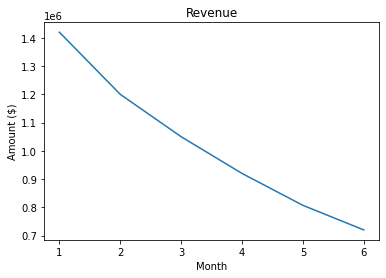

In [5]:
plt.plot(month,revenue)
plt.xlabel('Month')
plt.ylabel('Amount ($)')
plt.title('Revenue')
plt.show()

Let's create a another plot of monthly expenses over the past 6 months.

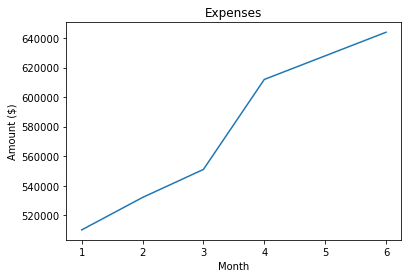

In [6]:
plt.plot(month,expenses)
plt.xlabel('Month')
plt.ylabel('Amount ($)')
plt.title('Expenses')
plt.show()

From the above two plots, revenue seems to be quickly decreasing while expenses are increasing. If the current trend continues, expenses will soon surpass revenues, putting the company at risk.

This is an alarming situation and expenses must be cut immediately.



In [7]:
# Let's load another file to analyse the expenses.

expense_overview = pd.read_csv(r"C:\Users\amanp\OneDrive\Desktop\expenses.csv")

In [8]:
expense_overview

,Expense,Proportion
0,Salaries,0.62
1,Advertising,0.15
2,Office Rent,0.15
3,Equipment,0.03
4,Utilities,0.03
5,Supples,0.01
6,Food,0.01


There are two columns:

Expense: indicates the expense category

Proportion: indicates how much of the overall expenses a specific category takes up

Let's store the Expense column in a variable called expense_categories and the Proportion column in a variable called proportions.

In [9]:
expense_categories = expense_overview['Expense']

proportions = expense_overview['Proportion']

Now let's create a pie chart of the different expense categories, using the plt.pie() method, passing in two arguments:

proportions
labels = expense_categories

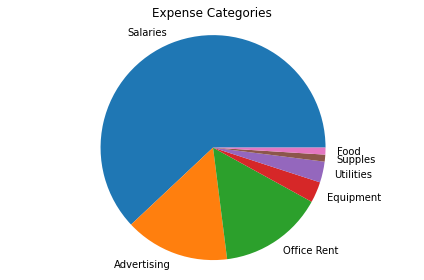

In [10]:
plt.pie(proportions, labels = expense_categories)
plt.title('Expense Categories')
plt.axis('Equal')
plt.tight_layout()
plt.show()

It seems that Salaries, Advertising, and Office Rent make up most of the expenses, while the rest of the categories make up a small percentage.

Before you hand this pie chart back to management, you would like to update the pie chart so that all categories making up less than 5% of the overall expenses (Equipment, Utilities, Supplies, and Food) are collapsed into an “Other” category.

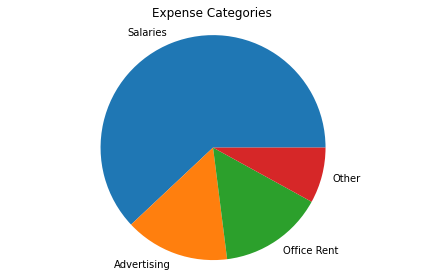

In [11]:
expense_categories = ['Salaries', 'Advertising', 'Office Rent', 'Other']
proportions = [0.62, 0.15, 0.15, 0.08]
plt.clf()
plt.pie(proportions, labels = expense_categories)
plt.title('Expense Categories')
plt.axis('Equal')
plt.tight_layout()
plt.show()

Now there are four categories in our updated pie chart:

Salaries
Advertising
Office Rent
Other
This simplified pie chart helps the management team see a big picture view of the company’s expenses without getting distracted by noisy data.
So, if the company wants to cut costs in a big way, we see that Salaries make up a majority of the expenses, so this is the category that the company should focus on in order to cut costs in a meaningful way.


Now, since salaries make up 62% of expenses, the management team determines that to cut costs in a meaningful way, they must let go of some employees.
Each employee at the company is assigned a productivity score based on their work. The management would like to keep the most highly productive employees and let go of the least productive employees.
So, let's first, use pandas to load in employees.csv and store it in a variable called employees and print the first few rows of the data.

In [12]:
employees = pd.read_csv(r"C:\Users\amanp\OneDrive\Desktop\employees.csv")
employees.head()

,Name,Salary,Productivity,Commute Time
0,Mason Pender �,87902,29.91,16.79
1,Mia Rew �,95672,49.91,44.48
2,Jalisa Kroenke �,177864,78.00,19.40
3,Krystal Homeyer �,186643,24.36,42.06
4,Kiana Wishart �,167148,4.08,25.58


We notice that there is a Productivity column, which indicates the productivity score assigned to that employee.

Let's sort the employees data frame (in ascending order) by the Productivity column and store the result in a variable called sorted_productivity.

In [13]:
sorted_productivity = employees.sort_values(by=['Productivity'])
 
sorted_productivity

,Name,Salary,Productivity,Commute Time
259,Wilber Rye �,111647,0.06,49.42
92,Fredric Gandee �,154469,0.24,22.48
252,Johnson Fordham �,168684,1.46,22.39
178,Lilia Lemoine �,167579,1.67,27.36
162,Hilma Laughton �,85506,1.79,36.41
...,...,...,...,...
164,Miki Hartle �,50856,99.54,31.39
88,Darell Nau �,30530,99.63,44.25
23,Joaquina Neece �,95562,99.66,48.65
202,Janae Officer �,110139,99.69,15.45


We now see the employees with the lowest productivity scores at the top of the data frame.

The company decides to let go of the 100 least productive employees.

Let's store the first 100 rows of sorted_productivity in a new variable called employees_cut and print out the result.
Unfortunately, this batch of employees won’t be so lucky.

In [14]:
employees_cut = sorted_productivity.head(100)
employees_cut

,Name,Salary,Productivity,Commute Time
259,Wilber Rye �,111647,0.06,49.42
92,Fredric Gandee �,154469,0.24,22.48
252,Johnson Fordham �,168684,1.46,22.39
178,Lilia Lemoine �,167579,1.67,27.36
162,Hilma Laughton �,85506,1.79,36.41
...,...,...,...,...
43,Bernardo Klingenberg �,55464,34.52,32.27
186,Ashleigh Istre �,178627,34.70,38.67
288,Penni Kimbrough �,142680,35.21,49.64
269,Margot Mackenzie �,114302,35.79,19.87



The COO (Chief Operating Officer) is debating whether to allow employees to continue to work from home post-pandemic.

He first wants to take a look at roughly how long the average commute time is for employees at the company. He asks for our help to analyze this data.

The employees data frame has a column called Commute Time that stores the commute time (in minutes) for each employee.

Let's create a variable called commute_times that stores the Commute Time column.

In [15]:
commute_times = employees['Commute Time']

In [16]:
# Let's do some quick analysis on the commute times of employees by using .describe() method.
commute_times.describe()

count    300.000000
mean      33.441700
std       16.128369
min        3.220000
25%       21.667500
50%       31.060000
75%       42.190000
max      101.780000
Name: Commute Time, dtype: float64

So, the average and median commute times are 33 and 31 minutes, respectively. It might be worth it for the company to explore allowing remote work indefinitely so employees can save time during the day.

Let’s explore the shape of the commute time data using a histogram.

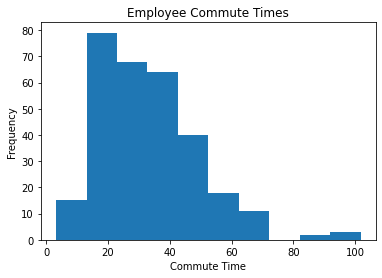

In [17]:
plt.hist(commute_times)
plt.title("Employee Commute Times")
plt.xlabel("Commute Time")
plt.ylabel("Frequency")
plt.show()

The data seems to be skewed to the right. To make it more symmetrical, let's apply a log transformation.

In [18]:
commute_times_log = np.log(commute_times)

Let's make the histogram for commute_times_log instead of commute_times.

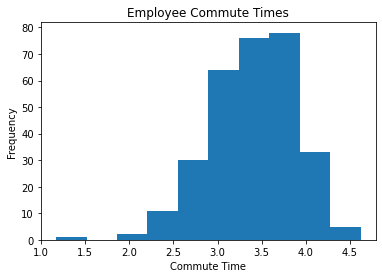

In [19]:
plt.hist(commute_times_log)
plt.title("Employee Commute Times")
plt.xlabel("Commute Time")
plt.ylabel("Frequency")
plt.show()

Now the transformed data looks more “normal” than before.

### Conclusion and next steps:

In this project, we performed data analysis to help a management team answer important questions about the status of the company during a difficult time.

We did this by analyzing data sets and applying common data transformation techniques.

Further, we can :

Apply standardization to the employees data using StandardScaler() from sklearn. 

Explore the income and productivity features in more detail to find a relationship between productivity and income, etc.